In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import seaborn as sns
import scipy.stats as st

In [2]:
# csv files path
country_data = "Resources/noc_regions.csv"
athlete_data = "Resources/athlete_events.csv"

# Read the csv files
#ountry_df = pd.read_csv(country_data)
athlete_df = pd.read_csv(athlete_data)
#Display Data 
#country_df.head()
athlete_df.head()



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
#Combine the data into a single dataset
#combined_data = pd.merge(country_read, athlete_read, how ='outer')
#Display the data table for preview
#combined_data.head()

In [4]:
athlete_df.isnull().values.any()


True

In [5]:
olympic_df = athlete_df.dropna()


In [6]:
olympic_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [7]:
olympic_df.isnull().sum().any()

False

In [8]:
print(olympic_df.Medal.unique())

['Bronze' 'Gold' 'Silver']


In [9]:
# Summer Gold Medals
summer_gold = olympic_df[(olympic_df['Season'] == 'Summer')][['Medal','Year']]
summer_gold = summer_gold[(summer_gold['Medal']=='Gold')][['Medal','Year']]
summer_gold

,Medal,Year
42,Gold,1948
44,Gold,1948
48,Gold,1948
172,Gold,2008
173,Gold,2008
...,...,...
270981,Gold,2004
271009,Gold,2004
271016,Gold,1996
271049,Gold,1996


In [10]:
summer_gold = summer_gold.groupby('Year').count()


In [11]:
summer_gold

,Medal
Year,
1896,11
1900,19
1904,34
1906,29
1908,54
1912,58
1920,78
1924,65
1928,62


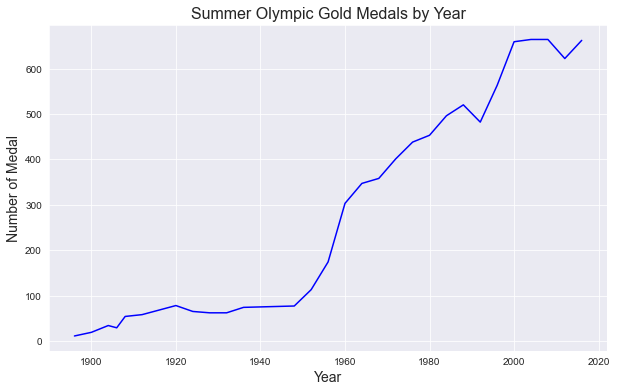

In [12]:
sns.set_style('darkgrid')
# matplotlib.rcParams['figure.figsize'] = (12, 10)
plt.figure(figsize=(10,6))
sns.lineplot(data=summer_gold, x='Year', y='Medal', color= "blue")
plt.title("Summer Olympic Gold Medals by Year", size = 16)
plt.xlabel("Year", size = 14)
plt.ylabel('Number of Medal', size = 14)
plt.show()

In [13]:
#Winter Gold Medals
winter_gold = olympic_df[(olympic_df['Season'] == 'Winter')][['Medal','Year']]
winter_gold = winter_gold[(winter_gold['Medal']== 'Gold')][['Medal','Year']]
winter_gold


,Medal,Year
60,Gold,1992
73,Gold,2002
76,Gold,2002
78,Gold,2006
636,Gold,1994
...,...,...
270480,Gold,1980
270609,Gold,2014
270610,Gold,2014
270641,Gold,1992


In [14]:
winter_gold = winter_gold.groupby('Year').count()


In [15]:
winter_gold

,Medal
Year,
1924,7
1928,5
1932,4
1936,13
1948,3
1952,11
1956,24
1960,35
1964,50


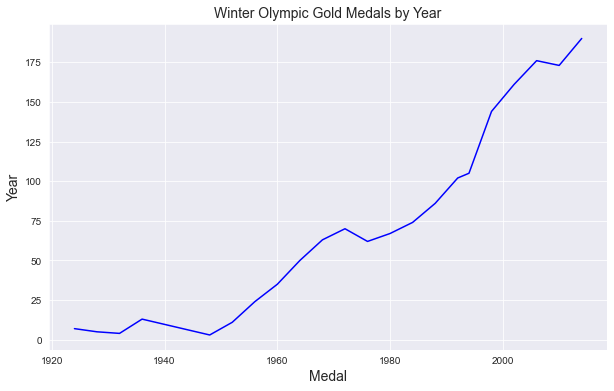

In [16]:
sns.set_style('darkgrid')
# matplotlib.rcParams['figure.figsize'] = (12, 10)
plt.figure(figsize=(10,6))
sns.lineplot(data=winter_gold, x='Year', y='Medal', color= "blue")
plt.title("Winter Olympic Gold Medals by Year", size = 14)
plt.ylabel("Year", size = 14)
plt.xlabel("Medal", size = 14)
plt.show()

In [17]:
gender_by_medal = pd.crosstab(olympic_df['Sex'],olympic_df['Medal'])
gender_by_medal

Medal,Bronze,Gold,Silver
Sex,,,
F,3475,3437,3438
M,6673,6730,6428


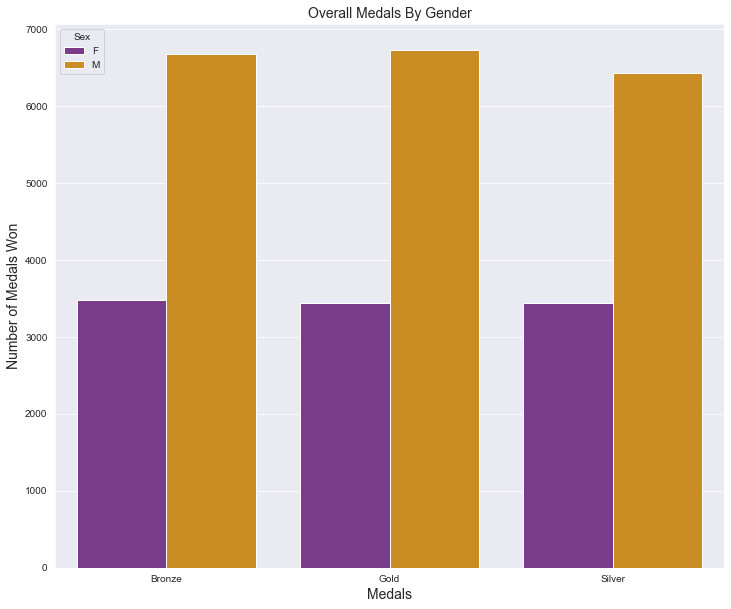

In [21]:
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (12, 10)
plt.title("Overall Medals By Gender", size = 14)

#To moved the Medal to become the inner row index
stacked = gender_by_medal.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.Medal, y=stacked.value, hue=stacked.Sex, palette="CMRmap")
plt.ylabel("Number of Medals Won", size = 14)
plt.xlabel("Medals", size = 14)
plt.show()

In [22]:
gold = []
gold_data = olympic_df[olympic_df['Medal']=='Gold']

for sport in gold_data['Sport'].unique():
    gold.append([sport,len(gold_data[gold_data['Sport']==sport])])

print(f"Sports with the most Gold Medals:\n")

gold = pd.DataFrame(gold,columns=['Sport','Count_of_Gold_Medals'])
gold_sport=gold.sort_values(by='Count_of_Gold_Medals',ascending=False).head(5)
gold_sport

Sports with the most Gold Medals:



,Sport,Count_of_Gold_Medals
12,Athletics,1292
20,Swimming,912
7,Rowing,720
22,Ice Hockey,442
8,Hockey,395


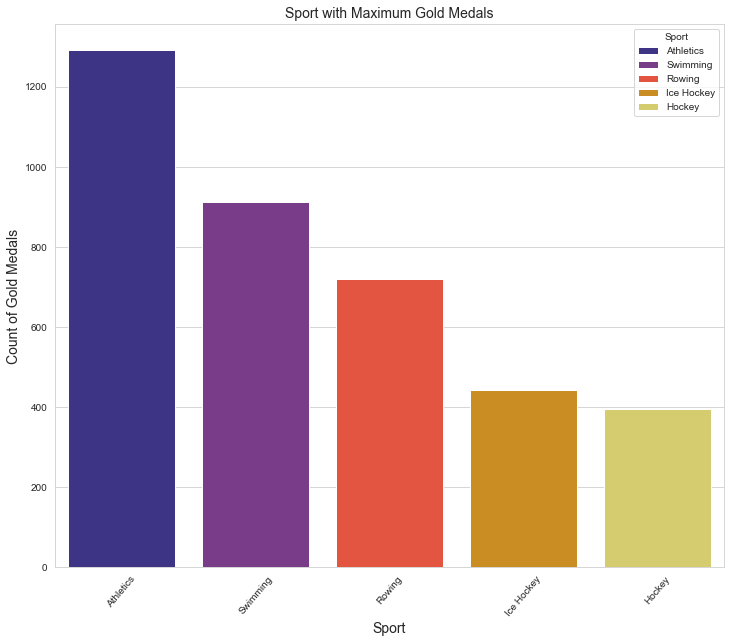

In [23]:
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (12, 10)

plt.title("Sport with Maximum Gold Medals", size = 14)
barplot = sns.barplot(data=gold_sport, x="Sport", y="Count_of_Gold_Medals", hue="Sport", palette="CMRmap", dodge=False)
barplot.set_xticklabels(rotation=50, labels=gold_sport.Sport)
plt.ylabel("Count of Gold Medals", size= 14)
plt.xlabel("Sport",size = 14)
plt.show()

Text(0.5, 1.0, 'Pies made of Gold')

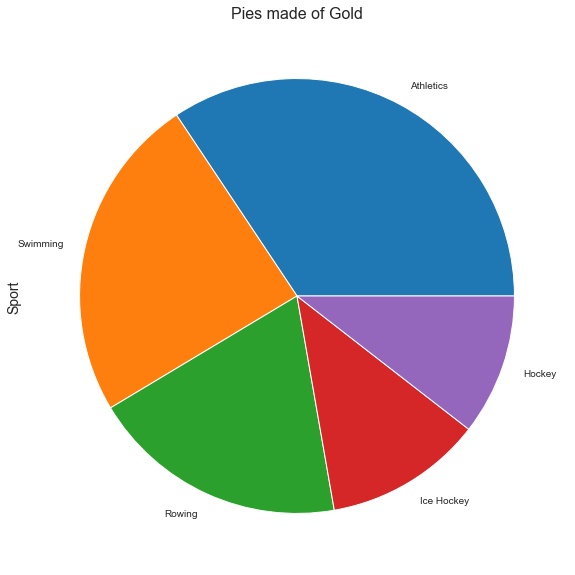

In [24]:
gold_data['Medal'].unique()
gold=gold_data[gold_data['Medal'] == 'Gold']
gold['Sport'].value_counts().head().plot.pie(figsize = (10,10))
plt.ylabel('Sport', size = 14)
plt.title("Pies made of Gold", size = 16)

In [25]:
Individual_medal = olympic_df[["Name","Medal"]]
Individual_medal['Name'].unique()
Individual_medal = Individual_medal.value_counts("Name").reset_index(name="Counts_of_Medals")[:5]
print(f"Participants with the most medals:\n")
Individual_medal

Participants with the most medals:



,Name,Counts_of_Medals
0,"Michael Fred Phelps, II",28
1,Larysa Semenivna Latynina (Diriy-),18
2,Nikolay Yefimovich Andrianov,15
3,Ole Einar Bjrndalen,13
4,Borys Anfiyanovych Shakhlin,13


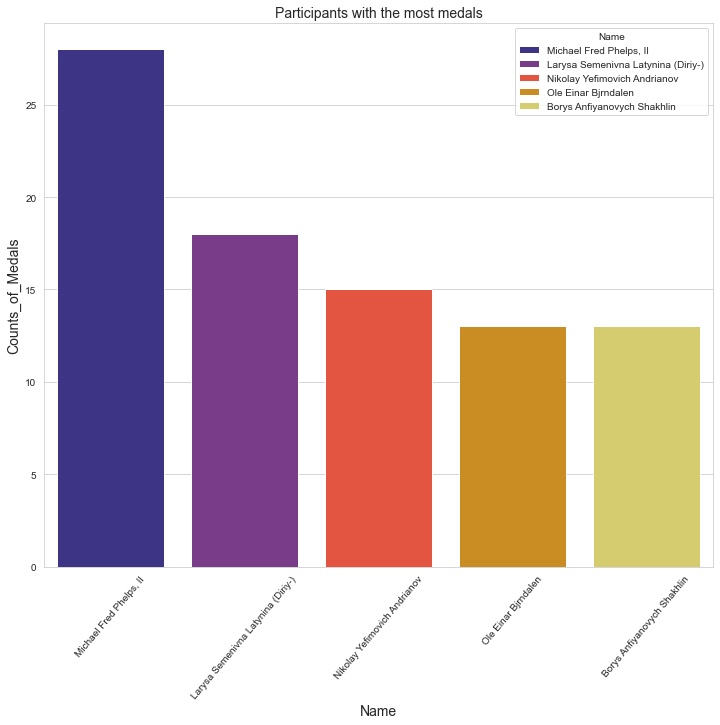

In [31]:
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (12, 10)

plt.title("Participants with the most medals", size = 14)
barplot = sns.barplot(data=Individual_medal, x="Name", y="Counts_of_Medals", hue="Name", palette="CMRmap", dodge=False)
barplot.set_xticklabels(rotation=50, labels=Individual_medal.Name)
plt.ylabel("Counts_of_Medals", size = 14)
plt.xlabel("Name", size = 14)
plt.show()

In [32]:
Gold_medal = olympic_df[(olympic_df["Medal"] == "Gold")][["Name", "Medal"]]
Gold_medal = Gold_medal.value_counts(["Name"]).reset_index(name = "Counts_of_Gold_Medal")[:5]
print(f"Participants with the most Gold Medals:\n")
Gold_medal

Participants with the most Gold Medals:



,Name,Counts_of_Gold_Medal
0,"Michael Fred Phelps, II",23
1,"Raymond Clarence ""Ray"" Ewry",10
2,Paavo Johannes Nurmi,9
3,Larysa Semenivna Latynina (Diriy-),9
4,Mark Andrew Spitz,9


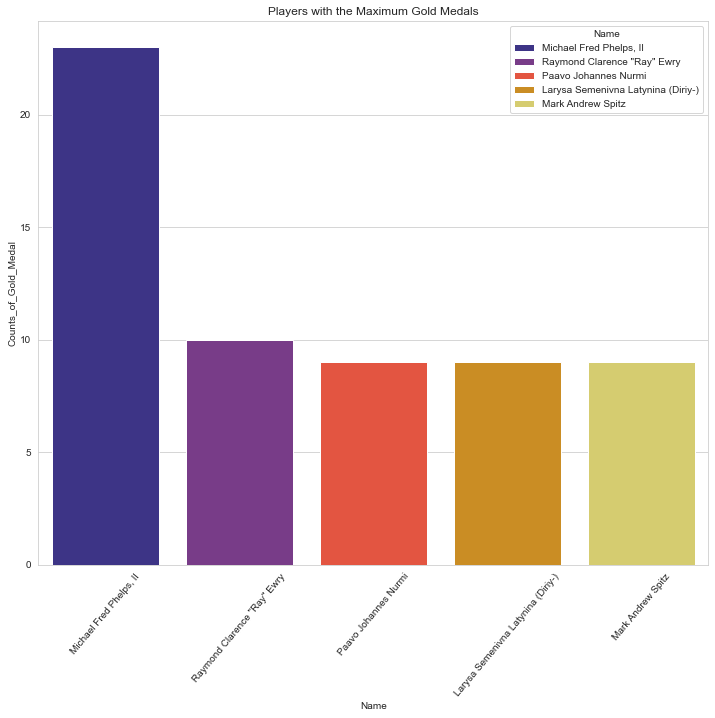

In [28]:
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (12, 10)

plt.title("Players with the Maximum Gold Medals", size = 14)
barplot = sns.barplot(data=Gold_medal, x="Name", y="Counts_of_Gold_Medal", hue="Name", palette="CMRmap", dodge=False)
barplot.set_xticklabels(rotation=50, labels=Gold_medal.Name)
plt.ylabel("Counts_of_Gold_Medal", size = 14)
plt.xlabel("Name", size = 14)
plt.show()
